In [ ]:
#!pip install -q transformers datasets accelerate
#!pip install numpy==1.24.4 --force-reinstall
#!pip install --no-cache-dir transformers==4.41.1 datasets accelerate

!pip uninstall -y transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers
!pip install --no-cache-dir transformers==4.41.1

Found existing installation: transformers 4.53.3
Uninstalling transformers-4.53.3:
  Successfully uninstalled transformers-4.53.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 167.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# STEP 1: Clean install
!pip uninstall -y transformers
!pip install --no-cache-dir transformers==4.41.1


Found existing installation: transformers 4.41.1
Uninstalling transformers-4.41.1:
  Successfully uninstalled transformers-4.41.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 95.9 MB/s eta 0:00:00


In [ ]:
# 1. Uninstall everything cleanly
!pip uninstall -y transformers datasets huggingface_hub

# 2. Remove any leftover package folders manually
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/datasets
!rm -rf /usr/local/lib/python3.11/dist-packages/huggingface_hub

# 3. Reinstall cleanly
!pip install --no-cache-dir transformers==4.41.1 datasets huggingface_hub


Found existing installation: transformers 4.41.1
Uninstalling transformers-4.41.1:
  Successfully uninstalled transformers-4.41.1
Found existing installation: datasets 3.6.0
Uninstalling datasets-3.6.0:
  Successfully uninstalled datasets-3.6.0
Found existing installation: huggingface-hub 0.33.1
Uninstalling huggingface-hub-0.33.1:
  Successfully uninstalled huggingface-hub-0.33.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 195.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 189.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Initial EDA

In [ ]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.describe()

,cop
count,182822.000000
mean,1.365257
std,1.115507
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [ ]:
df.head()

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None


### Investigating subject_name as it might serve as our label

In [ ]:
df.groupby('subject_name').size().reset_index(name='count').sort_values('count', ascending=False)

,subject_name,count
7,Medicine,17887
19,Surgery,16862
11,Pathology,14884
1,Anatomy,14560
13,Pharmacology,13758
18,Social & Preventive Medicine,11882
8,Microbiology,11314
6,Gynaecology & Obstetrics,10013
3,Dental,8938
14,Physiology,8830


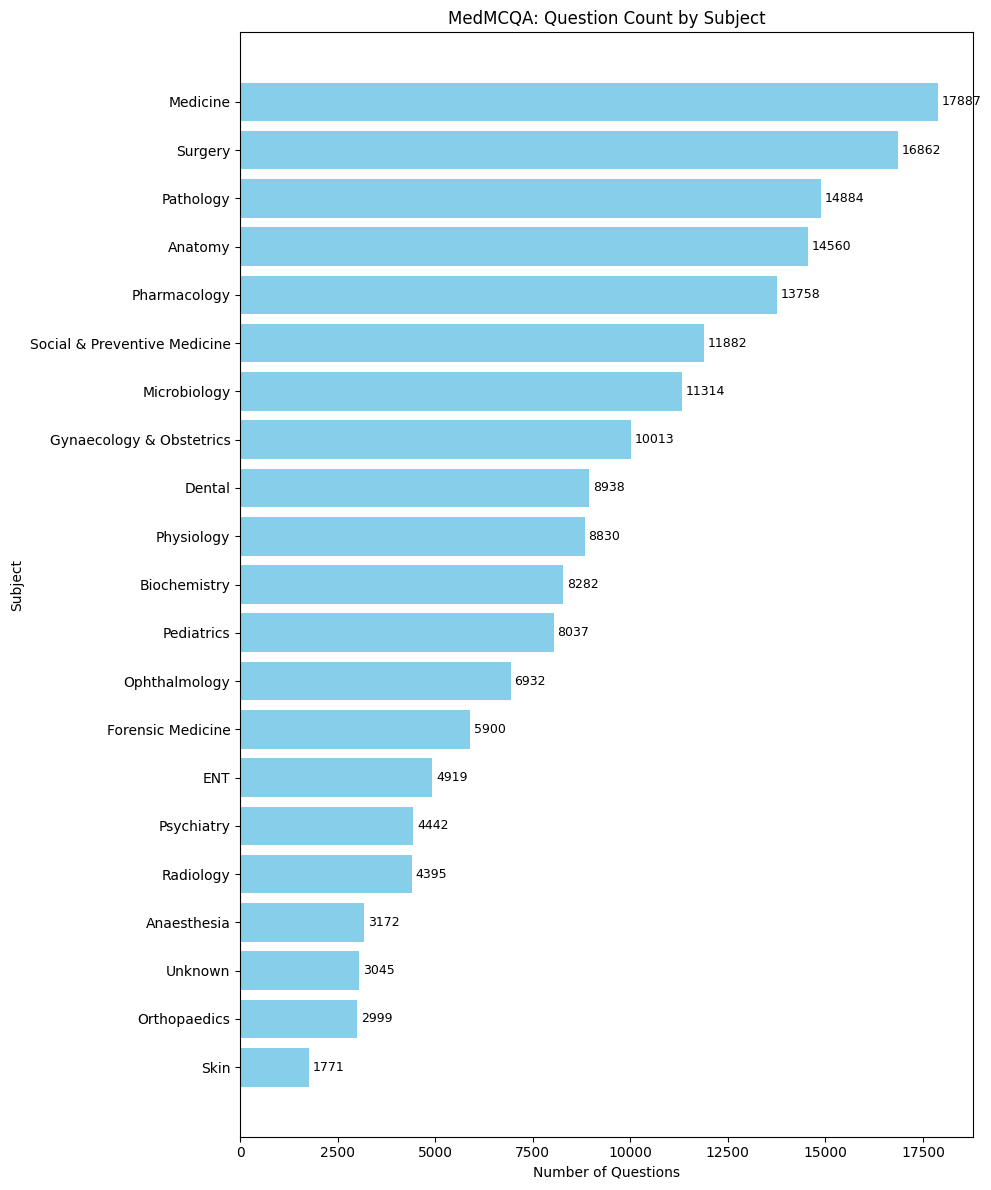

In [ ]:
import matplotlib.pyplot as plt

# Group and sort the data
subject_counts = (
    df.groupby('subject_name')
      .size()
      .reset_index(name='count')
      .sort_values('count', ascending=True)
)

# Plot
plt.figure(figsize=(10, 12))
bars = plt.barh(subject_counts['subject_name'], subject_counts['count'], color='skyblue')
plt.xlabel('Number of Questions')
plt.ylabel('Subject')
plt.title('MedMCQA: Question Count by Subject')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center', fontsize=9)

plt.tight_layout()
plt.show()


### We see that there are 3,045 unknowns. We want to see if the topic names can tell us more about them so we can fill them in

In [ ]:
print(df[df['subject_name'] == 'Unknown']['topic_name'].value_counts())

topic_name
Integrated QBank    311
Name: count, dtype: int64


### Even though unknowns are not the best references here but we will keep them as we might find it useful to identify questions which cannot be labeled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['question'],
    df['subject_name'],
    test_size=0.2,
    random_state=42,
)

# Vectorize train and test


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Create baseline logistic regression results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluate performance
print("Accuracy of train set:", accuracy_score(y_train, model.predict(X_train_vec)))
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of train set: 0.7186459451513432
Accuracy of test set: 0.6375769178175851

Classification Report:
                               precision    recall  f1-score   support

                 Anaesthesia       0.70      0.56      0.62       632
                     Anatomy       0.66      0.61      0.64      2945
                Biochemistry       0.72      0.74      0.73      1651
                      Dental       0.69      0.65      0.67      1736
                         ENT       0.76      0.66      0.71       950
           Forensic Medicine       0.79      0.76      0.78      1144
    Gynaecology & Obstetrics       0.75      0.74      0.75      2055
                    Medicine       0.49      0.58      0.53      3485
                Microbiology       0.66      0.70      0.68      2192
               Ophthalmology       0.83      0.78      0.81      1429
                Orthopaedics       0.51      0.33      0.40       608
                   Pathology       0.51      0.54  

ENT, Forensic, Ophthalmology, G&O tend to perform well, their precision scores are 0.75 - 0.81. Maybe they are performing well due to the nature of this subject areas have alot more specificity. Medicine, Pathology, Surgery do not have good percisions scores (0.52 - 0.59) as those topics might be too general and not spcific enough. Model does not do well with unknowns (0.58) and Skin/Orthopaedics due to small sample.

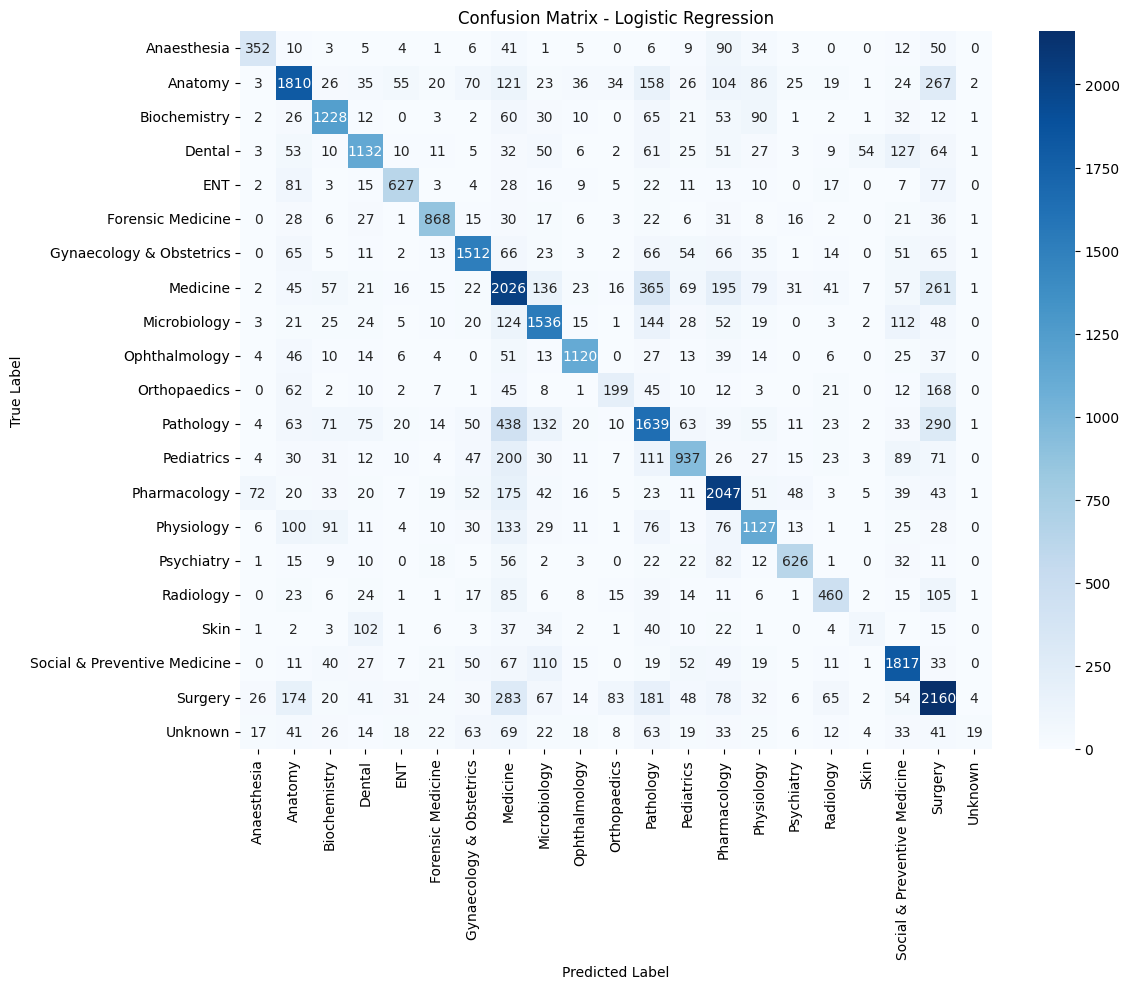

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📊 Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# 🎨 Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Confusion between Medicine -> Pathology (10.5%), Orthopedics -> Surgery (27.6%), pathology -> medicine (14.3%) and Skin -> Dental (28.2%). We tested with combine these into one and seeing if we got better results

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 📥 Load data
splits = {
    'train': 'data/train-00000-of-00001.parquet',
    'test': 'data/test-00000-of-00001.parquet',
    'validation': 'data/validation-00000-of-00001.parquet'
}
df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["train"])

# 🧠 Define subject groupings
merge_map = {
    "Medicine": "Medicine & Pathology",
    "Pathology": "Medicine & Pathology",
    "Orthopaedics": "Surgery & Orthopaedics",
    "Surgery": "Surgery & Orthopaedics",
    "Skin": "Skin & Dental",
    "Dental": "Skin & Dental"
}

# 🪄 Apply groupings to create new labels
df["grouped_subject"] = df["subject_name"].apply(lambda x: merge_map.get(x, x))

# ✂️ Split data
X_train, X_test, y_train, y_test = train_test_split(
    df["question"],
    df["grouped_subject"],
    test_size=0.2,
    random_state=42
)

# 🔡 Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 🤖 Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# 🧪 Predict and evaluate
y_pred = model.predict(X_test_vec)

print("✅ Accuracy of train set:", accuracy_score(y_train, model.predict(X_train_vec)))
print("✅ Accuracy of test set:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy of train set: 0.7417217637446413
✅ Accuracy of test set: 0.6681526049500889

📊 Classification Report:
                               precision    recall  f1-score   support

                 Anaesthesia       0.70      0.54      0.61       632
                     Anatomy       0.70      0.60      0.64      2945
                Biochemistry       0.74      0.73      0.73      1651
                         ENT       0.76      0.63      0.69       950
           Forensic Medicine       0.82      0.74      0.78      1144
    Gynaecology & Obstetrics       0.76      0.73      0.75      2055
        Medicine & Pathology       0.56      0.73      0.63      6538
                Microbiology       0.69      0.66      0.68      2192
               Ophthalmology       0.85      0.77      0.81      1429
                  Pediatrics       0.64      0.51      0.57      1688
                Pharmacology       0.66      0.73      0.70      2732
                  Physiology       0.66      

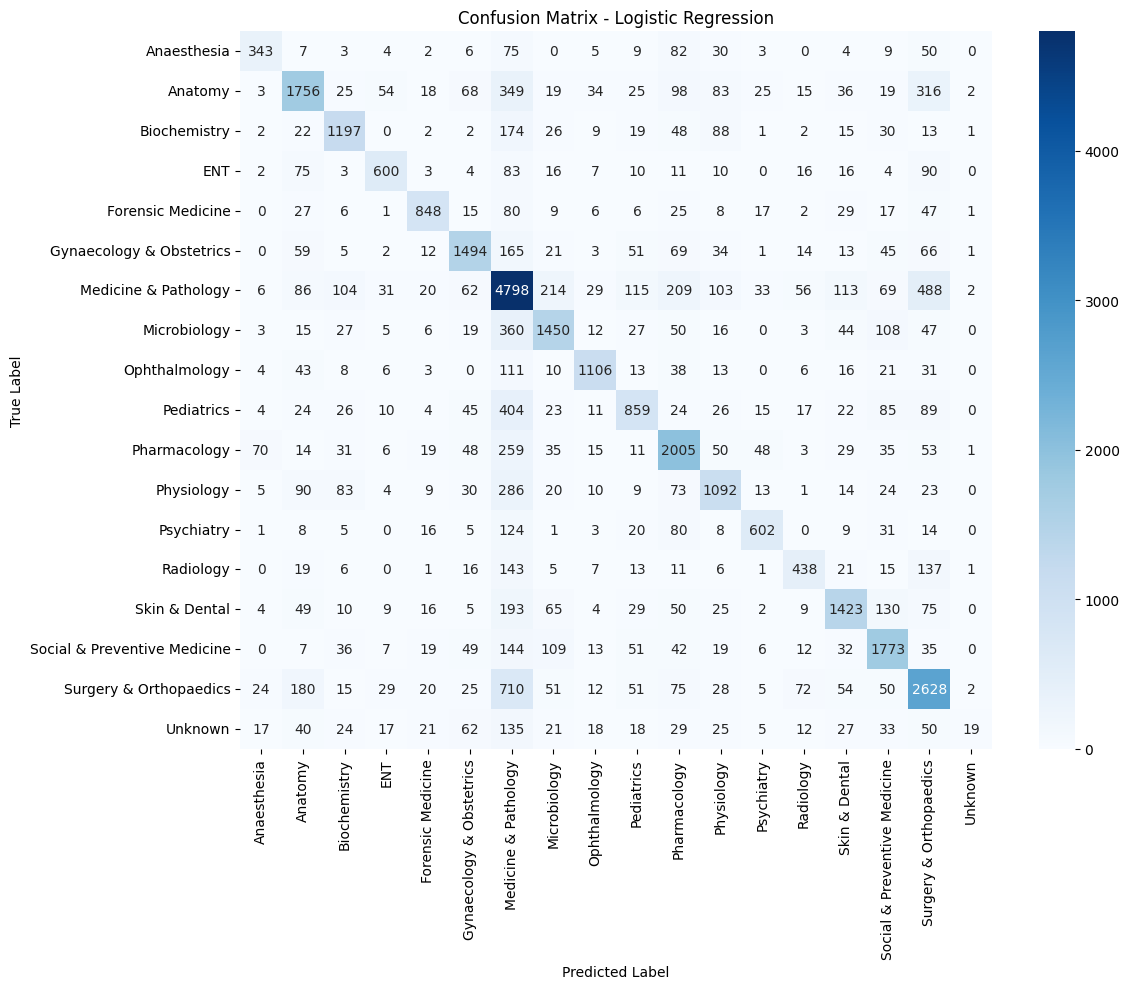

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📊 Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# 🎨 Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Rebuild test dataframe from your split variables
test_df = pd.DataFrame({
    "question": X_test,
    "grouped_subject": y_test
}).reset_index(drop=True)

# Convert y_pred to a pandas Series for easy masking
import pandas as pd
y_pred_series = pd.Series(y_pred)

# Mask for "Unknown" true label and predicted as "Medicine & Pathology"
mask = (test_df["grouped_subject"] == "Unknown") & (y_pred_series == "Medicine & Pathology")

confused_unknowns_df = test_df[mask]

print(f"🔍 Found {len(confused_unknowns_df)} 'Unknown' questions predicted as 'Medicine & Pathology'")

# Sample a few questions
print("\nSample questions:\n")
for q in confused_unknowns_df["question"].sample(5, random_state=42).tolist():
    print(q + "\n")


🔍 Found 135 'Unknown' questions predicted as 'Medicine & Pathology'

Sample questions:

A female presented with a severe headache of sudden onset. On CT scan a diagnosis of subarachnoid hemorrhage is made. The most common cause of subarachnoid hemorrhage is :

Which of the following is the auto antibody associated with Rheumatoid arthritis -

Amyloid protein seen in dialysis patients?

A 8-yrs-old child has a history since early childhood of malabsorption, ataxia, acanthocytes in the peripheral blood, and very low cholesterol and triglyceride levels. In addition, the patient has been developing progressive, bilateral, concentric contraction of the visual fields and loss of central vision. The underlying pathogenesis of  this patient’s disease is:

A 23-year-old male presented with abdominal pain and bloody diarrhea of one-week duration. The following rectal mucosa biopsy is diagnostic of infection with -



In [ ]:
from pprint import pprint

print("\n📋 Sample Misclassified 'Unknown' Questions:")
pprint(confused_unknowns_df["question"].sample(5, random_state=42).tolist())



📋 Sample Misclassified 'Unknown' Questions:
['A female presented with a severe headache of sudden onset. On CT scan a '
 'diagnosis of subarachnoid hemorrhage is made. The most common cause of '
 'subarachnoid hemorrhage is :',
 'Which of the following is the auto antibody associated with Rheumatoid '
 'arthritis -',
 'Amyloid protein seen in dialysis patients?',
 'A 8-yrs-old child has a history since early childhood of malabsorption, '
 'ataxia, acanthocytes in the peripheral blood, and very low cholesterol and '
 'triglyceride levels. In addition, the patient has been developing '
 'progressive, bilateral, concentric contraction of the visual fields and loss '
 'of central vision. The underlying pathogenesis of  this patient’s disease '
 'is:',
 'A 23-year-old male presented with abdominal pain and bloody diarrhea of '
 'one-week duration. The following rectal mucosa biopsy is diagnostic of '
 'infection with -']


In [ ]:
# Vectorize questions
confused_vectors = vectorizer.transform(confused_unknowns_df["question"])

# Get top terms
import numpy as np

mean_tfidf = np.asarray(confused_vectors.mean(axis=0)).ravel()
top_indices = mean_tfidf.argsort()[-10:][::-1]
top_terms = [vectorizer.get_feature_names_out()[i] for i in top_indices]

print("\n🔤 Top TF-IDF Terms in Misclassified 'Unknown' Questions:")
pprint(top_terms)



🔤 Top TF-IDF Terms in Misclassified 'Unknown' Questions:
['the', 'in', 'of', 'is', 'seen', 'and', 'with', 'following', 'are', 'which']


In [ ]:
!pip install bert-score
from bert_score import score

# List of all Unknown questions
unknown_df = df[df["subject_name"] == "Unknown"]
all_unknown_questions = unknown_df["question"].tolist()

# List of confused Unknowns predicted as Medicine & Pathology
confused_unknown_questions = confused_unknowns_df["question"].tolist()


## Checking how similar confused unknown (labeled as unknowns but predicted as Medicine & Pathology) questions are with the overall unknown questions. Looking at the results they are similar semantically

In [ ]:
P, R, F1 = score(confused_unknown_questions, all_unknown_questions[:len(confused_unknown_questions)], lang="en", verbose=True)

print(f"\n💬 Average similarity (confused unknowns → unknowns):")
print(f"Precision: {P.mean().item():.4f}")
print(f"Recall:    {R.mean().item():.4f}")
print(f"F1:        {F1.mean().item():.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/5 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/3 [00:00<?, ?it/s]

done in 185.28 seconds, 0.73 sentences/sec

💬 Average similarity (confused unknowns → unknowns):
Precision: 0.8204
Recall:    0.8242
F1:        0.8220


## Checking how similar confused unknown (labeled as unknowns but predicted as Medicine & Pathology) questions are with the overall Medicine & Pathology questions. Looking at the results they are similar semantically too

In [ ]:
# Get a sample of Medicine & Pathology questions
mp_df = df[df["grouped_subject"] == "Medicine & Pathology"]
mp_questions = mp_df["question"].sample(n=len(confused_unknown_questions), random_state=42).tolist()

# Compare confused_unknowns with Medicine & Pathology
P_mp, R_mp, F1_mp = score(confused_unknown_questions, mp_questions, lang="en", verbose=True)

print(f"\n💬 Average similarity (confused unknowns → Medicine & Pathology):")
print(f"Precision: {P_mp.mean().item():.4f}")
print(f"Recall:    {R_mp.mean().item():.4f}")
print(f"F1:        {F1_mp.mean().item():.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/5 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/3 [00:00<?, ?it/s]

done in 216.78 seconds, 0.62 sentences/sec

💬 Average similarity (confused unknowns → Medicine & Pathology):
Precision: 0.8228
Recall:    0.8225
F1:        0.8224


## Compare knowns and unknowns

In [ ]:
# Number of unknowns
n_unknown = len(unknown_df)

# Sample from known classes only
known_df = df[df["grouped_subject"] != "Unknown"]
known_sample = known_df["question"].sample(n=n_unknown, random_state=42).tolist()

# Sample from unknowns
unknown_sample = unknown_df["question"].sample(n=n_unknown, random_state=42).tolist()


In [ ]:
from bert_score import score

P_unk2kn, R_unk2kn, F1_unk2kn = score(unknown_sample, known_sample, lang="en", verbose=True)

print("\n💬 Average similarity (unknowns → knowns):")
print(f"Precision: {P_unk2kn.mean().item():.4f}")
print(f"Recall:    {R_unk2kn.mean().item():.4f}")
print(f"F1:        {F1_unk2kn.mean().item():.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/96 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/48 [00:00<?, ?it/s]

done in 1835.75 seconds, 1.66 sentences/sec

💬 Average similarity (unknowns → knowns):
Precision: 0.8190
Recall:    0.8198
F1:        0.8191


## Run BERT and Rouge scores to compare options and question

In [ ]:
!pip install bert_score rouge_score -q

from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)

# 🔽 Load MedMCQA data from Hugging Face Hub (as DataFrame)
splits = {
    'train': 'data/train-00000-of-00001.parquet',
    'test': 'data/test-00000-of-00001.parquet',
}
train_df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["test"])

# 🔥 Reduce size for faster training (optional)
train_df = train_df.sample(frac=0.5, random_state=42).copy()
test_df = test_df.sample(frac=0.5, random_state=42).copy()

# ✅ Group similar subjects
group_map = {
    "Medicine": "Medicine & Pathology",
    "Pathology": "Medicine & Pathology",
    "Orthopaedics": "Surgery & Orthopaedics",
    "Surgery": "Surgery & Orthopaedics",
    "Skin": "Skin & Dental",
    "Dental": "Skin & Dental"
}
train_df["grouped_subject"] = train_df["subject_name"].replace(group_map)
test_df["grouped_subject"] = test_df["subject_name"].replace(group_map)

# 🔗 Step 2: Concatenate question + options
def concat_q_with_options(df):
    for col in ["question", "opa", "opb", "opc", "opd", "exp"]:
        df[col] = df[col].fillna("").astype(str)
    return (
        df["question"] + " [SEP] " +
        df["opa"] + " [SEP] " +
        df["opb"] + " [SEP] " +
        df["opc"] + " [SEP] " +
        df["opd"] + " [SEP] " +
        df["exp"]
    )

X_all = concat_q_with_options(pd.concat([train_df, test_df], ignore_index=True))
y_all = pd.concat([train_df["grouped_subject"], test_df["grouped_subject"]], ignore_index=True)

# 🧪 Step 3: Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)

# 🧾 Rebuild DataFrames from split
train_df = pd.DataFrame({"text": X_train, "grouped_subject": y_train})
test_df = pd.DataFrame({"text": X_test, "grouped_subject": y_test})

# 🔹 Take a subset to speed up evaluation
subset = train_df.sample(n=500, random_state=42)

# 🔹 Prepare question and options
questions = subset["text"].apply(lambda x: x.split(" [SEP] ")[0]).tolist()
options = subset["text"].apply(lambda x: " ".join(x.split(" [SEP] ")[1:5])).tolist()

# 🧠 BERTScore (Semantic Similarity)
P, R, F1 = bert_score(cands=options, refs=questions, lang="en", model_type="bert-base-uncased")
print(f"\n🔹 BERTScore:\nPrecision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

# 🧠 ROUGE (Lexical Overlap)
rouge = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge1_list, rouge2_list, rougeL_list = [], [], []

for q, o in zip(questions, options):
    scores = rouge.score(q, o)
    rouge1_list.append(scores["rouge1"].fmeasure)
    rouge2_list.append(scores["rouge2"].fmeasure)
    rougeL_list.append(scores["rougeL"].fmeasure)

print(f"\n🔹 ROUGE scores (average over {len(questions)} samples):")
print(f"ROUGE-1: {np.mean(rouge1_list):.4f}")
print(f"ROUGE-2: {np.mean(rouge2_list):.4f}")
print(f"ROUGE-L: {np.mean(rougeL_list):.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


🔹 BERTScore:
Precision: 0.3717, Recall: 0.3705, F1: 0.3692

🔹 ROUGE scores (average over 500 samples):
ROUGE-1: 0.0423
ROUGE-2: 0.0052
ROUGE-L: 0.0399


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



🔹 SBERT Cosine Similarity (average over 500 samples): 0.2558


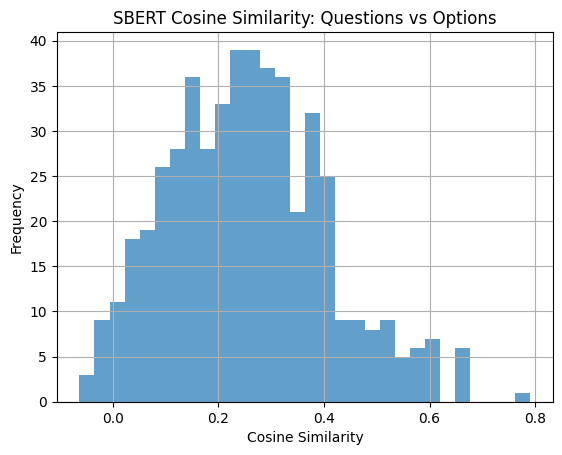

In [ ]:
# 📦 Install required libraries
!pip install sentence-transformers datasets pandas -q

# 📚 Imports
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split

# 🔽 Load MedMCQA data from Hugging Face Hub (as DataFrame)
splits = {
    'train': 'data/train-00000-of-00001.parquet',
    'test': 'data/test-00000-of-00001.parquet',
}
train_df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/" + splits["test"])

# ✅ Optional: Sample to speed things up
train_df = train_df.sample(frac=0.5, random_state=42).copy()
test_df = test_df.sample(frac=0.5, random_state=42).copy()

# ✅ Group similar subjects
group_map = {
    "Medicine": "Medicine & Pathology",
    "Pathology": "Medicine & Pathology",
    "Orthopaedics": "Surgery & Orthopaedics",
    "Surgery": "Surgery & Orthopaedics",
    "Skin": "Skin & Dental",
    "Dental": "Skin & Dental"
}
train_df["grouped_subject"] = train_df["subject_name"].replace(group_map)
test_df["grouped_subject"] = test_df["subject_name"].replace(group_map)

# 🔗 Concatenate question + options
def concat_q_with_options(df):
    for col in ["question", "opa", "opb", "opc", "opd", "exp"]:
        df[col] = df[col].fillna("").astype(str)
    return (
        df["question"] + " [SEP] " +
        df["opa"] + " [SEP] " +
        df["opb"] + " [SEP] " +
        df["opc"] + " [SEP] " +
        df["opd"] + " [SEP] " +
        df["exp"]
    )

X_all = concat_q_with_options(pd.concat([train_df, test_df], ignore_index=True))
y_all = pd.concat([train_df["grouped_subject"], test_df["grouped_subject"]], ignore_index=True)

# 🧪 Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)

# 🧾 Rebuild DataFrames from split
train_df = pd.DataFrame({"text": X_train, "grouped_subject": y_train})
test_df = pd.DataFrame({"text": X_test, "grouped_subject": y_test})

# 🔹 Take a smaller subset for SBERT eval
subset = train_df.sample(n=500, random_state=42)

# ✂️ Separate question and options
questions = subset["text"].apply(lambda x: x.split(" [SEP] ")[0]).tolist()
options = subset["text"].apply(lambda x: " ".join(x.split(" [SEP] ")[1:5])).tolist()

# 🧠 Load SBERT model
model = SentenceTransformer("all-MiniLM-L6-v2")  # Fast and accurate

# 🔍 Encode questions and options
q_embeddings = model.encode(questions, convert_to_tensor=True, show_progress_bar=True)
o_embeddings = model.encode(options, convert_to_tensor=True, show_progress_bar=True)

# 📏 Cosine similarity
cos_sim_matrix = util.cos_sim(q_embeddings, o_embeddings)
similarities = cos_sim_matrix.diag().cpu().numpy()

# 📊 Print results
print(f"\n🔹 SBERT Cosine Similarity (average over {len(similarities)} samples): {similarities.mean():.4f}")

# 📉 Optional: Distribution
import matplotlib.pyplot as plt
plt.hist(similarities, bins=30, alpha=0.7)
plt.title("SBERT Cosine Similarity: Questions vs Options")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# ✅ Load MedMCQA data (adjust path if needed)
df = pd.read_parquet("hf://datasets/openlifescienceai/medmcqa/data/train-00000-of-00001.parquet")

# ✅ Replace NaNs and select relevant columns
df = df.fillna("")
columns = ["subject_name", "question", "opa", "opb", "opc", "opd"]
df = df[columns]

# ✅ Show a few sample questions with subject and options
for i, row in df.sample(50, random_state=42).iterrows():
    print("🔸 Subject:", row["subject_name"])
    print("❓ Question:", row["question"])
    print("🅰️ A:", row["opa"])
    print("🅱️ B:", row["opb"])
    print("🇨 C:", row["opc"])
    print("🇩 D:", row["opd"])
    print("-" * 80)


🔸 Subject: Ophthalmology
❓ Question: Normal visual acuity of 6/6 is achieved by the age of:
🅰️ A: 2 years
🅱️ B: 3 years
🇨 C: 5 years
🇩 D: 7 years
--------------------------------------------------------------------------------
🔸 Subject: Surgery
❓ Question: Primary feature of small intestinal obstruction -
🅰️ A: Fever
🅱️ B: High peristalsis with colic
🇨 C: Abdominal distension
🇩 D: Empty rectum
--------------------------------------------------------------------------------
🔸 Subject: Gynaecology & Obstetrics
❓ Question: Regarding unicornuate uterus true is
🅰️ A: Defect in fusion of mullerian ducts
🅱️ B: Single uterus with 2 fallopian tubes
🇨 C: One duct is completely absent
🇩 D: Best reproductive outcome
--------------------------------------------------------------------------------
🔸 Subject: Pediatrics
❓ Question: Characteristic lab findings of hemophilia A are –a) ↑ PTb) ↑ aPTTc) X–linked recessived) Presence of 30% of factor level express the diseasee) Increased bleeding time
🅰️ 